<a href="https://colab.research.google.com/github/mohammedmoin44/Bank_Curch_ANN/blob/main/Bank_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling.csv']))
df.head()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Since CustomerId,Rownumber,surname are does not provide relevant information for churn prediction and hence are droped
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#Creating X and y 
a =['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
X = df[a]
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
#writing a function to get unique values of columns
def print_uniq_val_colm(df):
    for column in df:
      if df[column].dtypes == 'object':
          print(f'{column}:{df[column].unique()}')

In [ ]:
print_uniq_val_colm(X)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [ ]:
X.Age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [ ]:
X.CreditScore.unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [ ]:
X.CreditScore.min()

350

In [ ]:
#Since 850 is a maximum credit score the credit score does not contain any outlier
X.CreditScore.max()

850

Text(0.5, 1.0, 'Bank Customer churn prediction')

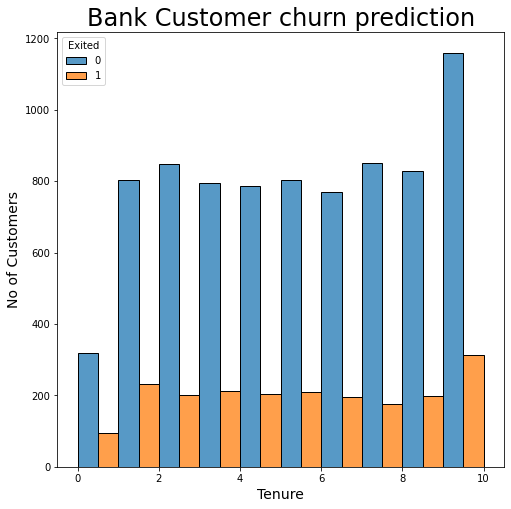

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Tenure',hue='Exited',multiple="dodge",binwidth = 1)
gr.set_xlabel("Tenure",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

**From the above figure we can see the customer who have tenure between 9 to 10 have pretty high chances of exit relative to the other tenure period**

In [ ]:
df.Tenure.max()

10

In [ ]:
#Since ML only understans numbers the gender column is encoded 
X['Gender'].replace({'Female':0,'Male':1},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
X = pd.get_dummies(data= X,columns=['Geography'])

In [ ]:
X.IsActiveMember.unique()

array([1, 0])

In [ ]:
X.HasCrCard.unique()

array([1, 0])

In [ ]:
X.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [ ]:
#chosing columns for scaling using minmax scaler
to_be_scl = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

In [ ]:
#importing minmax scaler for scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[to_be_scl] = scaler.fit_transform(X[to_be_scl])


In [ ]:
#Getting unique value of each column from a dataframe

for col in X:
    print(f'{col}: {X[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

Text(0.5, 1.0, 'Bank Customer churn prediction')

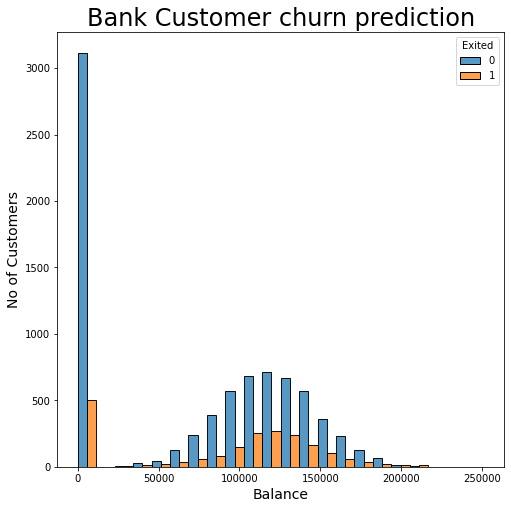

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Balance',hue='Exited',multiple="dodge")
gr.set_xlabel("Balance",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

# From the above figure we can see the customer who have Zero balance have pretty high chances of exit 

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='CreditScore',hue='Exited',multiple="dodge")
gr.set_xlabel("Credit Score",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

NameError: ignored

# From the above figure we can see the customer who have credit score between 600 to 700 have pretty high chances of exit relative to other but customers are numbered between 1 to 150 less compared with balance and tenure variables so Credit score has less impact on Exit

Text(0.5, 1.0, 'Bank Customer churn prediction')

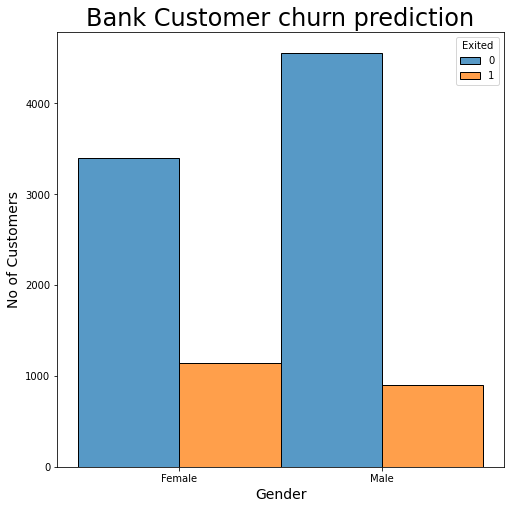

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Gender',hue='Exited',multiple="dodge")
gr.set_xlabel("Gender",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

# Female customer's are tend to exit more compare to male customer's

Text(0.5, 1.0, 'Bank Customer churn prediction')

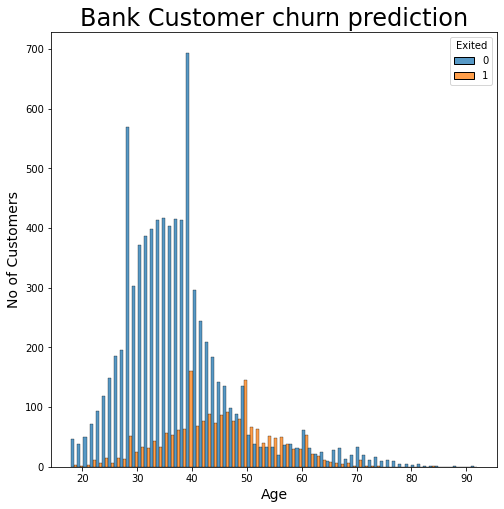

In [ ]:

plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Age',hue='Exited',multiple="dodge")
gr.set_xlabel("Age",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

Text(0.5, 1.0, 'Bank Customer churn prediction')

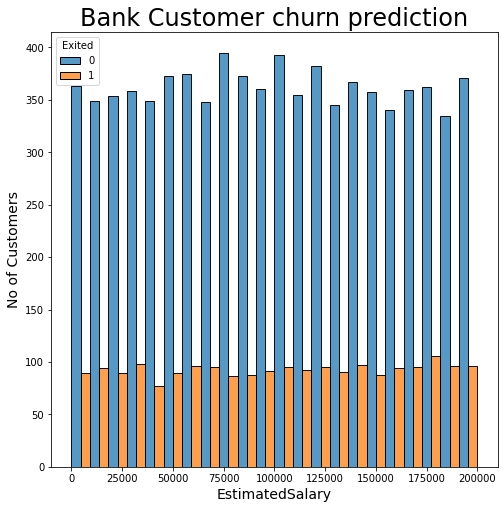

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='EstimatedSalary',hue='Exited',multiple="dodge")
gr.set_xlabel("EstimatedSalary",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

Text(0.5, 1.0, 'Bank Customer churn prediction')

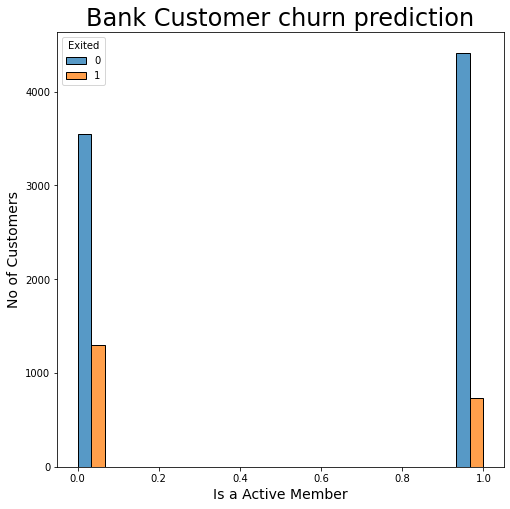

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='IsActiveMember',hue='Exited',multiple="dodge")
gr.set_xlabel("Is a Active Member",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

# Non Active Members tend to exit the bank more compare to active members in 1000's

Text(0.5, 1.0, 'Bank Customer churn prediction')

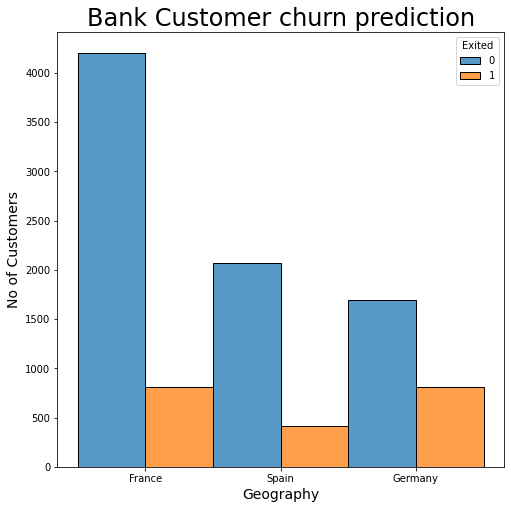

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='Geography',hue='Exited',multiple="dodge")
gr.set_xlabel("Geography",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

Text(0.5, 1.0, 'Bank Customer churn prediction')

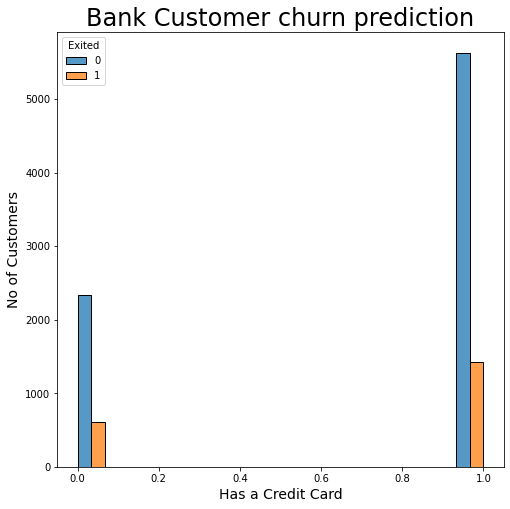

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='HasCrCard',hue='Exited',multiple="dodge")
gr.set_xlabel("Has a Credit Card",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

# Customer's who have credit card tend to exit the bank more compare those who don't

Text(0.5, 1.0, 'Bank Customer churn prediction')

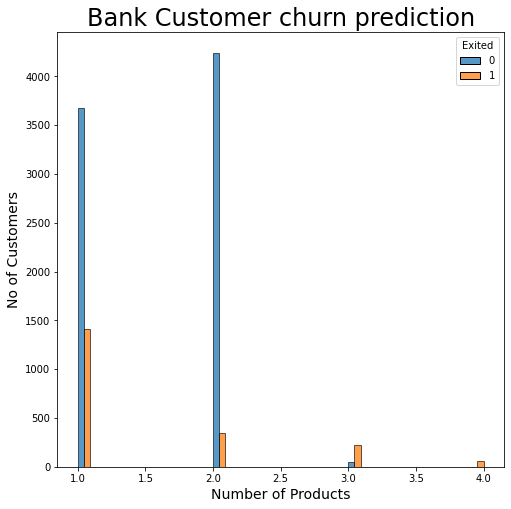

In [ ]:
plt.figure(figsize=(8,8))
gr=sns.histplot(data=df,x='NumOfProducts',hue='Exited',multiple="dodge")
gr.set_xlabel("Number of Products",fontsize=14)
gr.set_ylabel("No of Customers",fontsize=14)
gr.set_title('Bank Customer churn prediction',fontsize=24)

# Customers who have only one product have tend to exit more

In [ ]:
#Dividing dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=1,stratify=y)

In [ ]:

#importing neede libraries 

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

#defining function that takes  train and test data and gives out the predictios 

def ANN(X_train, y_train, X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(12, input_dim=12, activation='relu'),
        keras.layers.Dense(115, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=100)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds) 
    return y_preds



In [ ]:

import numpy as np
y_preds = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy')



Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.5042 - accuracy: 0.7961
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4611 - accuracy: 0.8060
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4419 - accuracy: 0.8104
Epoch 4/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8208
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8299
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.8375
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8432
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3567 - accuracy: 0.8481
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8480
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3509 - accura

In [ ]:
#gettin precisin, recall and f1 score 
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.78      0.45      0.57       509

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.85      0.86      0.85      2500



Since we have low f1 score due to data inbalance there fore SMOTE or Ensemble methods can be used or any other suitable method can be used to overcome this problem

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
#dat is imbalanced we have more number of 0's than 1's
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

In [ ]:
df_0.shape

(7963, 11)

In [ ]:
df_1.shape

(2037, 11)

In [ ]:
from imblearn.over_sampling import SMOTE


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)


In [ ]:
X_sm.value_counts()

CreditScore  Gender  Age       Tenure    Balance   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  Geography_Spain
0.000000     0       0.297297  0.000000  0.442805  0.000000       1          1               0.861630         1                 0                  0                  1
0.678000     1       0.662162  0.900000  0.626130  0.000000       1          1               0.497440         0                 1                  0                  1
                     0.054054  0.400000  0.543823  0.000000       1          0               0.259868         1                 0                  0                  1
                     0.108108  0.400000  0.481183  0.000000       0          1               0.745383         0                 1                  0                  1
                     0.202703  0.200000  0.644942  0.333333       1          0               0.846932         0                 1                  0                 

In [ ]:
#After using smote we have balanced data
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15,stratify=y_sm)

In [ ]:


y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')



Epoch 1/100
399/399 [==============================] - 1s 1ms/step - loss: 0.6283 - accuracy: 0.6479
Epoch 2/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5835 - accuracy: 0.6931
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5629 - accuracy: 0.7138
Epoch 4/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7196
Epoch 5/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7319
Epoch 6/100
399/399 [==============================] - 1s 1ms/step - loss: 0.5119 - accuracy: 0.7411
Epoch 7/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4950 - accuracy: 0.7529
Epoch 8/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4795 - accuracy: 0.7659
Epoch 9/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4706 - accuracy: 0.7714
Epoch 10/100
399/399 [==============================] - 1s 1ms/step - loss: 0.4626 - accura

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1593
           1       0.85      0.76      0.80      1593

    accuracy                           0.81      3186
   macro avg       0.82      0.81      0.81      3186
weighted avg       0.82      0.81      0.81      3186



The f1-score,precision,recall have increassed after applying smote technique

In [ ]:
from imblearn.over_sampling import ADASYN

Aaptiv = ADASYN(sampling_strategy='minority')
AX_sm, Ay_sm = Aaptiv.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(AX_sm,Ay_sm, test_size=0.2, random_state=15,stratify=Ay_sm)

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy')

Epoch 1/100
410/410 [==============================] - 1s 2ms/step - loss: 0.6581 - accuracy: 0.6172
Epoch 2/100
410/410 [==============================] - 1s 1ms/step - loss: 0.6122 - accuracy: 0.6646
Epoch 3/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5733 - accuracy: 0.7030
Epoch 4/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7225
Epoch 5/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7305
Epoch 6/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5202 - accuracy: 0.7365
Epoch 7/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5110 - accuracy: 0.7439
Epoch 8/100
410/410 [==============================] - 1s 1ms/step - loss: 0.5041 - accuracy: 0.7454
Epoch 9/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4999 - accuracy: 0.7508
Epoch 10/100
410/410 [==============================] - 1s 1ms/step - loss: 0.4949 - accura

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_preds))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1593
           1       0.81      0.77      0.79      1688

    accuracy                           0.79      3281
   macro avg       0.79      0.79      0.79      3281
weighted avg       0.79      0.79      0.79      3281



#SMOTE seems to be more reliable compare to ADASYN for this dataset